<a href="https://colab.research.google.com/github/ThomasPineda/Procesamiento-de-imagenes/blob/main/Python/Clasificaci%C3%B3n_de_imagenes_de_n%C3%BAmeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reto N1 - Thomas Pineda # 1001505812
Clasificación de imagémes con Redes Neuronales

In [ ]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=394acfdc0c4e2d311541fea08f970b1f4b09c9289299b202f54acae678e7a9b2
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
#Se cargan las librerías para la tarea
from keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



para el ejercicio se requiere hacer un modelo de clasificación de imagenes con imagenes númericas de la libreria MNIST, para esto se utilizaron Redes Neuronales


In [ ]:
#Definir conjunto de entrenamieno y prueba
 (x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


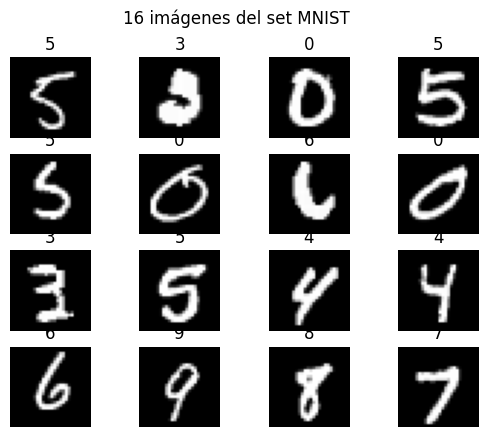

In [ ]:
#Explorar los datos del dataset
ids_imgs = np.random.randint(0,x_train.shape[0],16)
for i in range(len(ids_imgs)):
	img = x_train[ids_imgs[i],:,:]
	plt.subplot(4,4,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title(y_train[ids_imgs[i]])
plt.suptitle('16 imágenes del set MNIST')
plt.show()


In [ ]:
#dimensiones de los datos de entrenamiento
print(x_train.shape,y_train.shape)


(60000, 28, 28) (60000,)


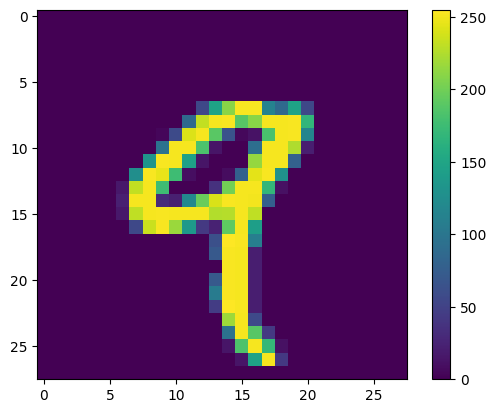

In [ ]:
#Visualizar la imagen en una escala de de color
plt.figure()
plt.imshow(x_train[4])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Reorganizar las imagenes en una sola matriz para entrarla al modelo de clasificación y normalizar los datos de intensidad dentro de la matriz
X_train = np.reshape( x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#Volver la salida en one-hot coding
nclasses = 10
Y_train = to_categorical(y_train,nclasses)
Y_test = to_categorical(y_test,nclasses)

In [ ]:
 Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#Modelo


In [ ]:
# CREACIÓN NDE LA RED NEURONAL
input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]

Red = Sequential()

Red.add( Dense(15, input_dim=input_dim, activation='relu'))
Red.add( Dense(output_dim, activation='softmax'))


sgd = SGD(lr=0.2)
Red.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

num_epochs = 40

batch_size = 1000
modelo1 = Red.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=2)


historia_entrenamiento = Red.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=2)

# Hacer predicciones con el modelo compilado y entrenado (Red)
Y_pred = Red.predict(X_test)

# Calcular la precisión en el conjunto de prueba
puntaje = Red.evaluate(X_test, Y_test, verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100 * puntaje[1]))

Epoch 1/40
60/60 - 1s - loss: 2.2418 - accuracy: 0.1883 - 641ms/epoch - 11ms/step
Epoch 2/40
60/60 - 0s - loss: 2.0266 - accuracy: 0.3634 - 285ms/epoch - 5ms/step
Epoch 3/40
60/60 - 0s - loss: 1.7818 - accuracy: 0.4890 - 281ms/epoch - 5ms/step
Epoch 4/40
60/60 - 0s - loss: 1.5478 - accuracy: 0.6123 - 283ms/epoch - 5ms/step
Epoch 5/40
60/60 - 0s - loss: 1.3412 - accuracy: 0.7040 - 277ms/epoch - 5ms/step
Epoch 6/40
60/60 - 0s - loss: 1.1651 - accuracy: 0.7550 - 276ms/epoch - 5ms/step
Epoch 7/40
60/60 - 0s - loss: 1.0234 - accuracy: 0.7821 - 284ms/epoch - 5ms/step
Epoch 8/40
60/60 - 0s - loss: 0.9149 - accuracy: 0.8006 - 292ms/epoch - 5ms/step
Epoch 9/40
60/60 - 0s - loss: 0.8308 - accuracy: 0.8135 - 284ms/epoch - 5ms/step
Epoch 10/40
60/60 - 0s - loss: 0.7645 - accuracy: 0.8244 - 277ms/epoch - 5ms/step
Epoch 11/40
60/60 - 0s - loss: 0.7113 - accuracy: 0.8338 - 295ms/epoch - 5ms/step
Epoch 12/40
60/60 - 0s - loss: 0.6677 - accuracy: 0.8422 - 266ms/epoch - 4ms/step
Epoch 13/40
60/60 - 0s -

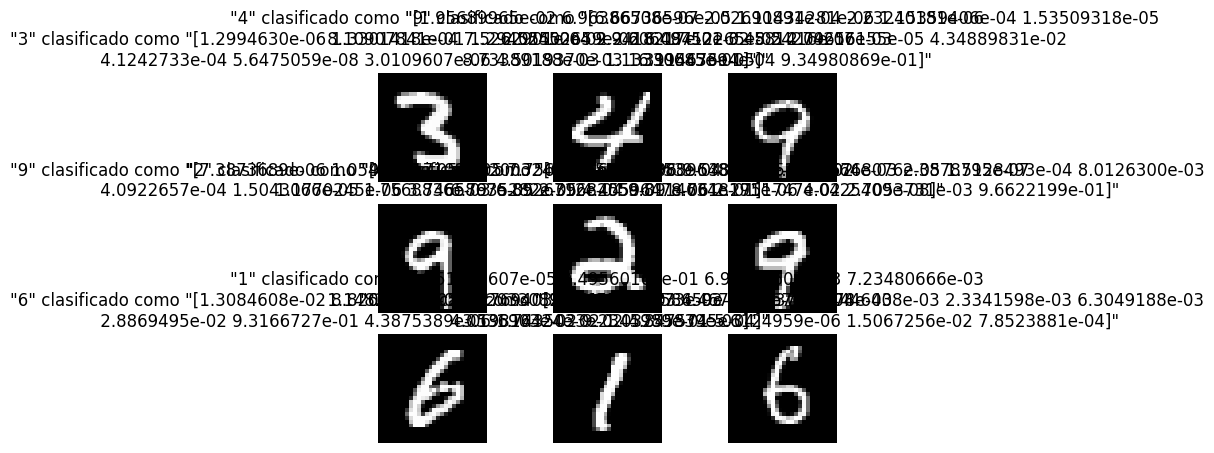

In [ ]:
ids_imgs = np.random.randint(0,X_test.shape[0],9)
for i in range(len(ids_imgs)):
	idx = ids_imgs[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = Y_pred[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
#plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()


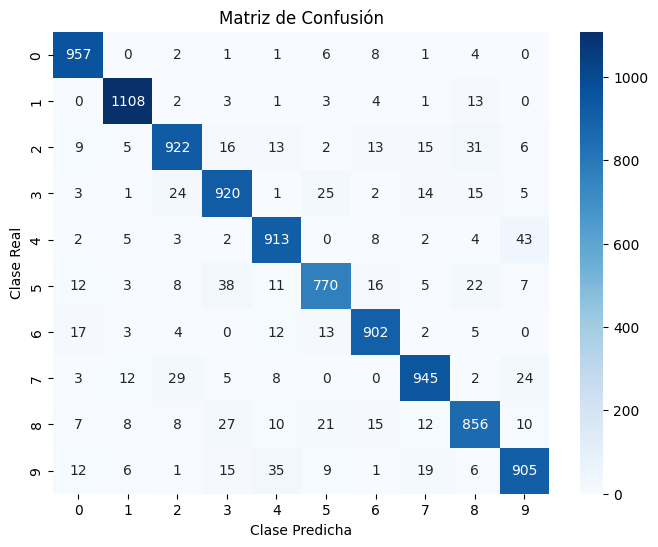

In [ ]:

# Obtener las clases predichas para el conjunto de prueba
predicted_classes = np.argmax(Y_pred, axis=1)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), predicted_classes)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(output_dim), yticklabels=range(output_dim))
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

por temas de tiempo no pude hacer la optimización de los hiperparametros pero se recomienda hacer un GridSearch o un RandomSearch para esta tarea y mejora el desempeño de la RedNeuronal